In [50]:
# %matplotlib widget

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [52]:
eeg_data_df = pd.read_csv("resources/EEG_data.csv")
eeg_demo_df = pd.read_csv("resources/demographic_info.csv")

In [53]:
eeg_data_df

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9.0,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9.0,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9.0,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9.0,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


In [54]:
eeg_demo_df

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [55]:
# merge the data and demographics dataframes
eeg_data_df = eeg_data_df.rename(columns={"SubjectID":"subject ID"})
eeg_data_df = eeg_data_df.astype({"subject ID":'int32'})
eeg_df = eeg_demo_df.merge(eeg_data_df, copy=True)

eeg_df

,subject ID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,9,24,Han Chinese,F,9.0,64.0,38.0,-39.0,127574.0,9951.0,709.0,21732.0,3872.0,39728.0,2598.0,960.0,1.0,0.0
12807,9,24,Han Chinese,F,9.0,61.0,35.0,-275.0,323061.0,797464.0,153171.0,145805.0,39829.0,571280.0,36574.0,10010.0,1.0,0.0
12808,9,24,Han Chinese,F,9.0,60.0,29.0,-426.0,680989.0,154296.0,40068.0,39122.0,10966.0,26975.0,20427.0,2024.0,1.0,0.0
12809,9,24,Han Chinese,F,9.0,60.0,29.0,-84.0,366269.0,27346.0,11444.0,9932.0,1939.0,3283.0,12323.0,1764.0,1.0,0.0


Throw out subject ID = 6 due to having no recorded Attention and Mediation Scores

In [56]:
eeg_df = eeg_df.drop(eeg_df[eeg_df["subject ID"]==6].index, inplace=False)

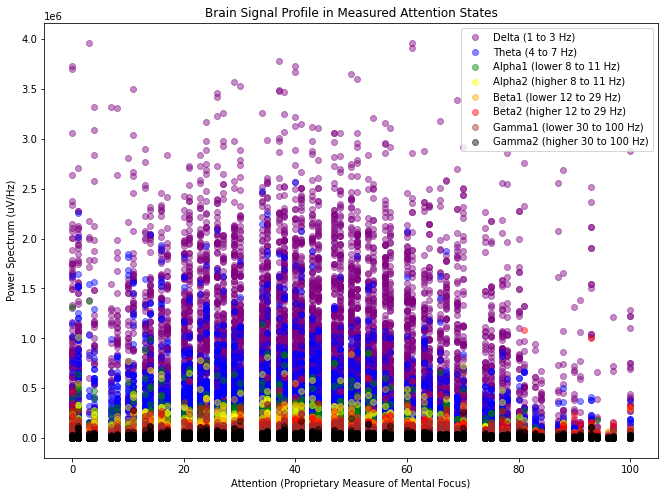

<Figure size 792x576 with 0 Axes>

<Figure size 792x576 with 0 Axes>

In [57]:
# What frequency Band is pronounced in relation to attention?(attention vs freq color coded to alpha,beta,theta,delta)

x_axis = eeg_df["Attention"]

y_axis = eeg_df["Delta"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='purple', label="Delta (1 to 3 Hz)")

y_axis = eeg_df["Theta"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='blue', label="Theta (4 to 7 Hz)")

y_axis = eeg_df["Alpha1"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='green', label="Alpha1 (lower 8 to 11 Hz)")

y_axis = eeg_df["Alpha2"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='yellow', label="Alpha2 (higher 8 to 11 Hz)")

y_axis = eeg_df["Beta1"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='orange', label="Beta1 (lower 12 to 29 Hz)")

y_axis = eeg_df["Beta2"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='red', label="Beta2 (higher 12 to 29 Hz)")

y_axis = eeg_df["Gamma1"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='brown', label="Gamma1 (lower 30 to 100 Hz)")

y_axis = eeg_df["Gamma2"]
plt.scatter(x_axis, y_axis, alpha=0.45, c='black', label="Gamma2 (higher 30 to 100 Hz)")

plt.legend()
plt.xlabel("Attention (Proprietary Measure of Mental Focus)")
plt.ylabel("Power Spectrum (uV/Hz)")
plt.title("Brain Signal Profile in Measured Attention States")
plt.show()

plt.rcParams['figure.figsize'] = [11,8]
plt.figure()




# How does cerebral activity modulate during different states of focus?
The above scatter plot diagram investigates the collective relationship between the level of attention all study participants express and the power output of brain signals at sub-divided band frequencies, provided by power spectral analysis. This analysis reveals a significant increase in full-spectrum brain activity in moderate levels of attention (20-60) while attenuating during maximal focus. In addition, Delta frequencies (1 to 3 Hz) and Theta (4 to 7 Hz) attenuate during maximal focus. Delta and theta are slow frequency bandwidths that are often associated with deep sleep and drowsiness. Observations suggesting a greater ratio of high frequency bandwidths to low, coincides with the current literature related to cognition. However, discussions related to brain activity and focus requires more nuance to sufficiently prove performance with confidence, as this experiment does not correlate a direct correlation with full spectrum EEG activity.

Text(60, 3500000, 'y = -7003.167x + 1025508.714')

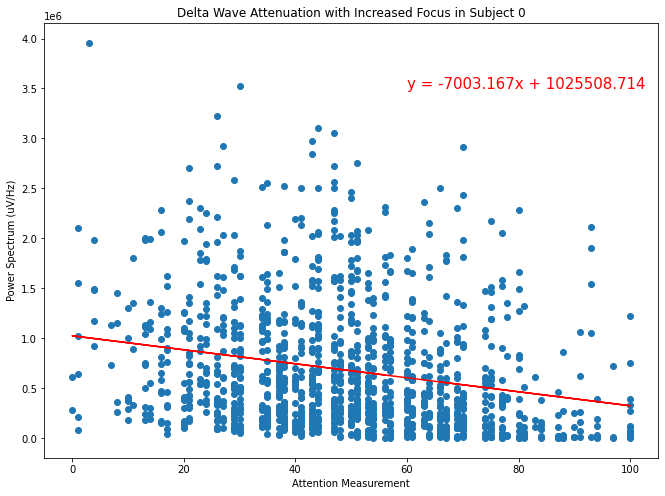

In [58]:
eeg_df_0 = eeg_df[eeg_df["subject ID"]==0]

x_axis = eeg_df_0["Attention"]
y_axis = eeg_df_0["Delta"]


plt.scatter(x_axis, y_axis)


slope, intercept, rvalue, pvalue, stderr = st.linregress(x_axis, y_axis)
regress_values = x_axis*slope+intercept
line_eq = f'y = {round(slope,3)}x + {round(intercept,3)}'
plt.plot(x_axis, regress_values, '-r')
plt.title("Delta Wave Attenuation with Increased Focus in Subject 0")
plt.xlabel("Attention Measurement")
plt.ylabel("Power Spectrum (uV/Hz)")
plt.annotate(line_eq, (60,3500000), color='red',fontsize=15)


Curve fit?

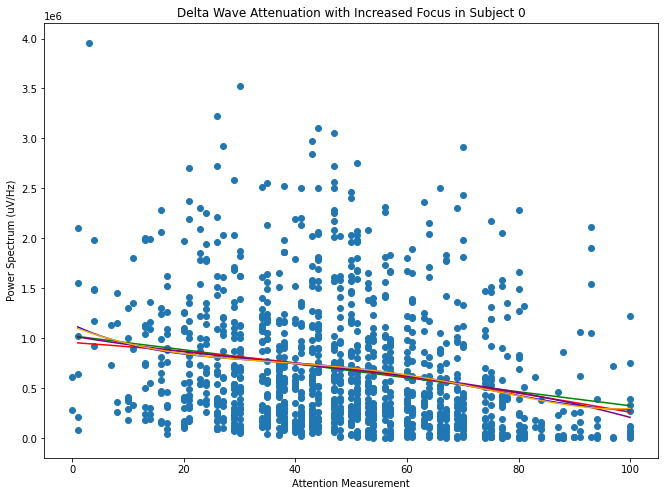

In [59]:
eeg_df_0 = eeg_df[eeg_df["subject ID"]==0]

x_axis = eeg_df_0["Attention"]
y_axis = eeg_df_0["Delta"]


plt.scatter(x_axis, y_axis)


# curve fits
model1 = np.poly1d(np.polyfit(x_axis,y_axis,1))
model2 = np.poly1d(np.polyfit(x_axis,y_axis,2))
model3 = np.poly1d(np.polyfit(x_axis,y_axis,3))
model4 = np.poly1d(np.polyfit(x_axis,y_axis,4))
model5 = np.poly1d(np.polyfit(x_axis,y_axis,5))
# scatter
polyline = np.linspace(1,100,4000000)

#plot curve

plt.plot(polyline, model1(polyline), color='green')
plt.plot(polyline, model2(polyline), color='red')
plt.plot(polyline, model3(polyline), color='purple')
plt.plot(polyline, model4(polyline), color='blue')
plt.plot(polyline, model5(polyline), color='orange')

#format
plt.title("Delta Wave Attenuation with Increased Focus in Subject 0")
plt.xlabel("Attention Measurement")
plt.ylabel("Power Spectrum (uV/Hz)")

plt.show()

# Preliminary Data Quantifies Delta Wave Attenuation During Focus
Single subject focus performance correlates with an attenuation in Delta activity. 

In [60]:
for subject in eeg_df["subject ID"].unique():
    x_axis = eeg_df.loc[eeg_df["subject ID"]==subject,"Attention"]
    y_axis = eeg_df.loc[eeg_df["subject ID"]==subject,"Delta"]
    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_axis,y_axis)
    print(slope)


-7003.166615939558
-7131.306461172594
-1430.661254431712
-3008.596898640389
-9901.886240708352
54.97730256648273
-10661.287075040285
-7279.298225507069
-291.40523903989396
